Subway Usage in NYC before and after the start of the COVID-19 Pandemic

Many aspects of human lives were fundamentally impacted by the lasting effects of the COVID-19 pandemic. One specific aspect that I would like to investigate is the impact of mass transit. For the first time in its history, the MTA New York City Transit did not run 24/7 because of the pandemic. Along with the myriad of service changes to cope with the diminishing traveling public, the agency also suffered from a lack of train crews to keep even its revised train schedules running on time. I hope to do uncover how drastically the pandemic impacted ridership and what the recovery has looked like over the past year.  Additionally, I would like to look into the future to see when we might get back to the previous number of subway users in years past. 


In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.graphics.tsaplots
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#this reads in the daily count csv file for some manipulation.
df=pd.read_csv('daily_count.csv')

In [3]:
df.head(3)

,station_id,date,graveyard_entries,morning_entries,afternoon_entries,night_entries,graveyard_exits,morning_exits,afternoon_exits,night_exits
0,1,2016/01/01,4126,972,6843,3241,5110,1261,7029,3720
1,1,2016/01/02,1862,1607,8367,4132,1822,1841,9581,4991
2,1,2016/01/03,2919,1457,7097,2964,2397,1580,8128,2987


In [4]:
#Current DF
df.dtypes

station_id            int64
date                 object
graveyard_entries     int64
morning_entries       int64
afternoon_entries     int64
night_entries         int64
graveyard_exits       int64
morning_exits         int64
afternoon_exits       int64
night_exits           int64
dtype: object

In [5]:
#Convert date data to be in datetime
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,station_id,date,graveyard_entries,morning_entries,afternoon_entries,night_entries,graveyard_exits,morning_exits,afternoon_exits,night_exits
0,1,2016-01-01,4126,972,6843,3241,5110,1261,7029,3720
1,1,2016-01-02,1862,1607,8367,4132,1822,1841,9581,4991
2,1,2016-01-03,2919,1457,7097,2964,2397,1580,8128,2987


In [6]:
entry_list =  list(df)
exit_list = list(df)

In [7]:
#Remove all of the unnecessary columns that don't have entry data in them.
entry_list.remove("station_id")
entry_list.remove("date")
entry_list.remove("graveyard_exits")
entry_list.remove("morning_exits")
entry_list.remove("afternoon_exits")
entry_list.remove("night_exits")
print(entry_list)

['graveyard_entries', 'morning_entries', 'afternoon_entries', 'night_entries']


In [8]:
#Remove all of the unnecessary columns that don't have exit data in them.
exit_list.remove("station_id")
exit_list.remove("date")
exit_list.remove("graveyard_entries")
exit_list.remove("morning_entries")
exit_list.remove("afternoon_entries")
exit_list.remove("night_entries")
print(exit_list)

['graveyard_exits', 'morning_exits', 'afternoon_exits', 'night_exits']


In [9]:
#Adding two columns to this df to show the total entries and exits per station per day.
df["total_entries"] = df[entry_list].sum(axis=1) 
df["total_exits"] = df[exit_list].sum(axis=1)

In [10]:
df = df.drop(['graveyard_entries', 'morning_entries', 'afternoon_entries', 'night_entries', 'graveyard_exits', 'morning_exits', 'afternoon_exits', 'night_exits'], axis=1)

In [11]:
df = df.rename(columns={'station_id': 'Station #', 'date': 'Date', 'total_entries': 'Total Entries', 'total_exits': 'Total Exits'})

In [12]:
df.dtypes

Station #                 int64
Date             datetime64[ns]
Total Entries             int64
Total Exits               int64
dtype: object

In [13]:
df['Total Entries'] = df['Total Entries'].clip(lower=0)
df['Total Exits'] = df['Total Exits'].clip(lower=0)
df.tail()

,Station #,Date,Total Entries,Total Exits
1032719,479,2021-11-21,0,0
1032720,479,2021-11-22,0,0
1032721,479,2021-11-23,0,0
1032722,479,2021-11-24,0,0
1032723,479,2021-11-25,0,0


In [14]:
def daily_totals(data):
    
    total_entries = []
    total_exits = []
    dates = []
    timedata = data.drop(['Station #', 'Total Entries', 'Total Exits'], axis=1)
    timedata = timedata.drop_duplicates()
    
    i = 0
    #While loop that will iterate through dates and add all total entries and exits for each date. 
    while i <= 2155:
        x = data.loc[data['Date'] == (timedata['Date'] [i]), 'Total Entries'].sum()
        y = data.loc[data['Date'] == (timedata['Date'] [i]), 'Total Exits'].sum()
        dates.append(timedata['Date'] [i])
        total_entries.append(x)
        total_exits.append(y)
        i += 1
        
    
    return total_entries, total_exits, dates

In [15]:
total_entries, total_exits, dates = daily_totals(df)

In [16]:
total_entries = np.array(total_entries)
total_exits = np.array(total_exits)
dates = np.array(dates)

column_values = ['Dates']
df = pd.DataFrame(data = dates, columns = column_values)
df['Total Entries'] = total_entries
df['Total Exits'] = total_exits

In [17]:
df

,Dates,Total Entries,Total Exits
0,2016-01-01,2526728,2084949
1,2016-01-02,2971689,2362068
2,2016-01-03,2424741,1953525
3,2016-01-04,5251329,3883860
4,2016-01-05,5256490,3895179
...,...,...,...
2151,2021-11-21,1276454,1789461
2152,2021-11-22,2508706,2934432
2153,2021-11-23,2604783,3089426
2154,2021-11-24,2446042,2913091


<AxesSubplot:title={'center':'Entries vs Exits'}, xlabel='Dates'>

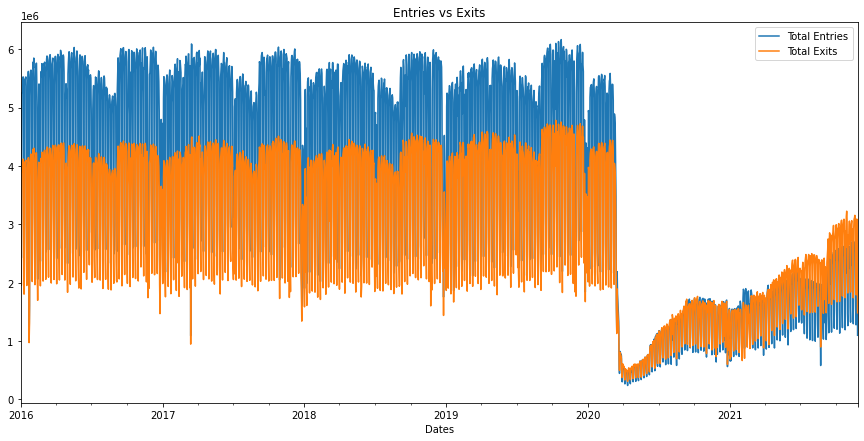

In [18]:
df.plot(x = 'Dates', y = ['Total Entries','Total Exits'], title = 'Entries vs Exits', figsize = (15,7))

Initial analyis of the data is that the Total Entries are not equal to the total exits. There are times when the entries are higher and the exits are lower, and vice versa. As a New Yorker who can speak from experience, I would say that the reason for more entries than exits is because when large crowds of people try to leave the subway platform, the emergency doors are opened so that people can exit quicker. 

On the otherhand, after the pandemic starts, it looks like exits are overtaking the entrances.  This can be from more people hopping over the turnstyles and not paying. With a lack of police presence in the subways, the data shows that more people are not paying their subway fairs. 

For a more accurate analysis, we will remove the exit data as it may be less accurate overall in comparison to the entry data. 

In [19]:
df = df[['Dates', 'Total Entries']]

<AxesSubplot:title={'center':'Entries'}, xlabel='Dates'>

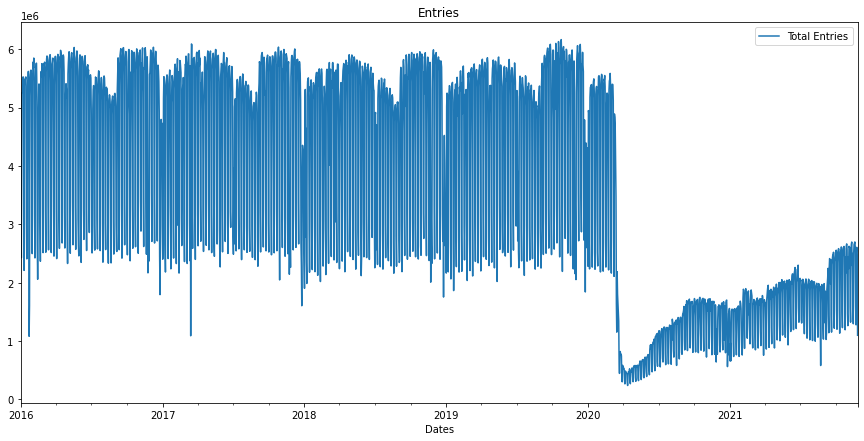

In [20]:
df.plot(x = 'Dates', y = ['Total Entries'], title = 'Entries', figsize = (15,7))

The data currently in df includes weekends.  Lets remove weekend data to hopefully streamline the data and make it less choppy.

<AxesSubplot:title={'center':'Entries'}, xlabel='Dates'>

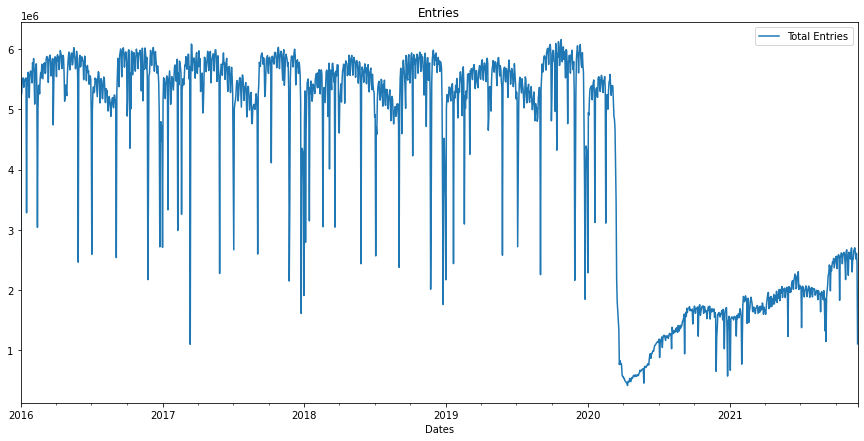

In [21]:
df = df[df['Dates'].dt.weekday < 5]
df.plot(x = 'Dates', y = ['Total Entries'], title = 'Entries', figsize = (15,7))

The data above appears to have some outliers that vary from the 5.5 million average before the pandemic.  I would guess that these days correspond with holidays, very bad weather, or very good weather. I believe all three of these situations could prevent subway usage. 

In [22]:
column_value = ['Dates']

In [23]:
d2016_2020 = df['Dates'][0:]
df2016_2020 = pd.DataFrame(data = d2016_2020, columns = column_value)

d2020 = df['Dates'][1045:1306]
df2020 = pd.DataFrame(data = d2020, columns = column_value)

d2019_2020 = df['Dates'][784:1306]
df2019_2020 = pd.DataFrame(data = d2019_2020, columns = column_value)

d2020_2021 = df['Dates'][1045:]
df2020_2021 = pd.DataFrame(data = d2020_2021, columns = column_value)

dfeb_apr = df['Dates'][1068:1131]
dffeb_apr = pd.DataFrame(data = dfeb_apr, columns = column_value)

dafter = df['Dates'][1098:]
df_after = pd.DataFrame(data = dafter, columns = column_value)

In [24]:
df2016_2020['Total Entries'] = df['Total Entries'][0:]
df2020['Total Entries'] = df['Total Entries'][1045:1306]
df2019_2020['Total Entries'] = df['Total Entries'][784:1306]
df2020_2021['Total Entries'] = df['Total Entries'][1045:]
dffeb_apr['Total Entries'] = df['Total Entries'][1068:1131]
df_after['Total Entries'] = df['Total Entries'][1098:]

Long Short Term Memory Model. 

This test is used to see how well a model would be able to keep up with the drop off of the pandemic.  While only being trained on data from one year before the pandemic, we will see how the model predicts the change. 

In [25]:
#Long Short Term Memory Model
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import date
from datetime import datetime, timedelta

In [26]:
df2019_2020 = df2019_2020.astype({"Total Entries": float})
df2019_2020["Dates"] = pd.to_datetime(df2019_2020.Dates, format="%Y-%m-%d")

In [27]:
df2019_2020.index = df2019_2020['Dates']
df2019_2020.drop("Dates",axis=1,inplace=True)

In [28]:
data = df2019_2020
data

,Total Entries
Dates,
2019-01-03,5246186.0
2019-01-04,5216802.0
2019-01-07,5126444.0
2019-01-08,5254754.0
2019-01-09,5374608.0
...,...
2020-12-28,1470288.0
2020-12-29,1506980.0
2020-12-30,1557052.0


In [29]:
#MIN-MAX Scaler
scaler=MinMaxScaler(feature_range=(0,1))

final_data = data.values
train_data = final_data[0:303,:]
test_data = final_data[303:,:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)



In [30]:
def create_dataset(df):
    x = []
    y = []
    for i in range(60, df.shape[0]):
        x.append(df[i-60:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [31]:
x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#LSTM Model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(np.shape(x_train)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

model_data=data[len(data)-len(test_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)



In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
def create_test(df):
    x = []
    for i in range(60, df.shape[0]):
        x.append(df[i-60:i, 0])
    x = np.array(x)
    
    return x

In [36]:
#TRAIN AND TEST
#y_train_data = np.array(y_train_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train, y_train, epochs=1, batch_size=1)

X_test=create_test(model_data)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))




243/243 [==============================] - 5s 13ms/step - loss: 0.0399


In [37]:
#PREDICTION FUNCTION
predicted_subway_entries=lstm_model.predict(X_test)
predicted_subway_entries=scaler.inverse_transform(predicted_subway_entries)

<ipython-input-38-9fdbd38f19bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions']=predicted_subway_entries


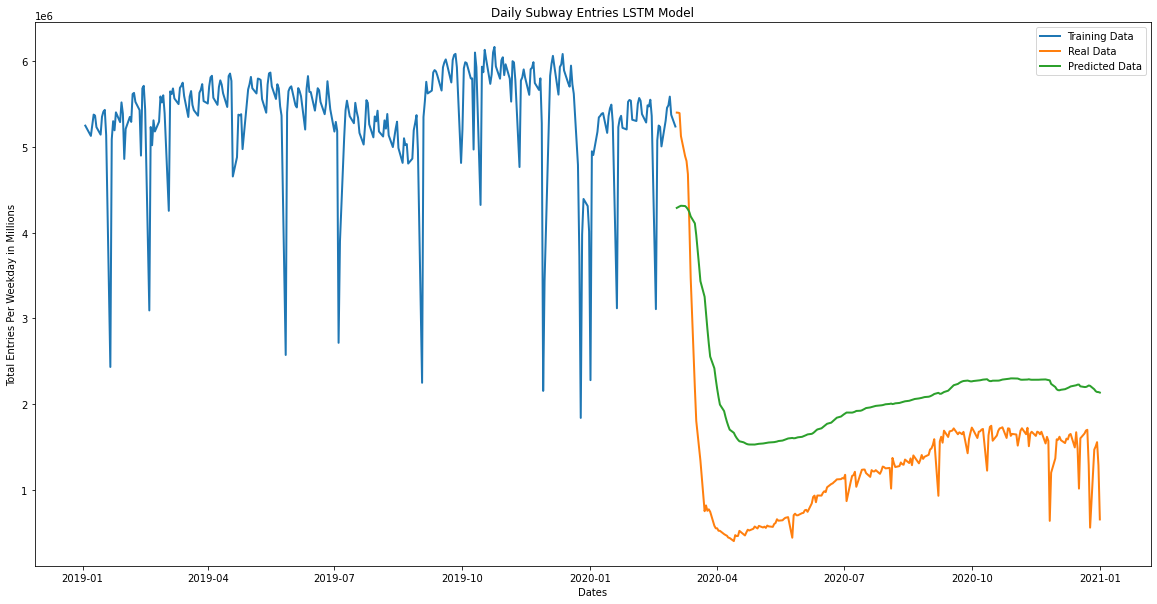

In [38]:
#RESULTS
train_data=data[:303]
test_data=data[303:]
test_data['Predictions']=predicted_subway_entries
plt.title('Daily Subway Entries LSTM Model')
plt.xlabel('Dates')
plt.ylabel('Total Entries Per Weekday in Millions')
plt.plot(train_data, lw=2, label='Training Data')
plt.plot(test_data['Total Entries'],lw =2, label='Real Data')
plt.plot(test_data['Predictions'],lw = 2, label='Predicted Data')

plt.legend(loc='upper right')

The above plot shows the predicted data lagging behind the real subway usage and never gets to the bottom that the pandemic brought. It also continues to expect the real data to shoot back up towards its normal values.  

Without previous data showing a drastic drop in subways usage, the model will not know how to predict the pandemic. 

LSTM 2: This model uses a different set of data showing the path of recovery and how a model will do making predicitions on a more steady trend.

In [39]:
df_after = df_after.astype({"Total Entries": float})
df_after["Dates"] = pd.to_datetime(df_after.Dates, format="%Y-%m-%d")

In [40]:
df_after.index = df_after['Dates']
df_after.drop("Dates",axis=1,inplace=True)

In [41]:
data = df_after

In [42]:
#MIN-MAX Scaler
scaler=MinMaxScaler(feature_range=(0,1))

final_data = data.values
train_data = final_data[0:303,:]
test_data = final_data[303:,:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)




In [43]:
def create_dataset(df):
    x = []
    y = []
    for i in range(60, df.shape[0]):
        x.append(df[i-60:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [44]:
x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

In [45]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
#LSTM Model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(np.shape(x_train)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

model_data=data[len(data)-len(test_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)



In [47]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
def create_test(df):
    x = []
    for i in range(60, df.shape[0]):
        x.append(df[i-60:i, 0])
    x = np.array(x)
    
    return x

In [49]:
#TRAIN AND TEST
#y_train_data = np.array(y_train_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train, y_train, epochs=1, batch_size=1)

X_test=create_test(model_data)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))




243/243 [==============================] - 5s 14ms/step - loss: 0.0277


In [50]:
#PREDICTION FUNCTION
predicted_subway_entries=lstm_model.predict(X_test)
predicted_subway_entries=scaler.inverse_transform(predicted_subway_entries)

<ipython-input-51-9fdbd38f19bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions']=predicted_subway_entries


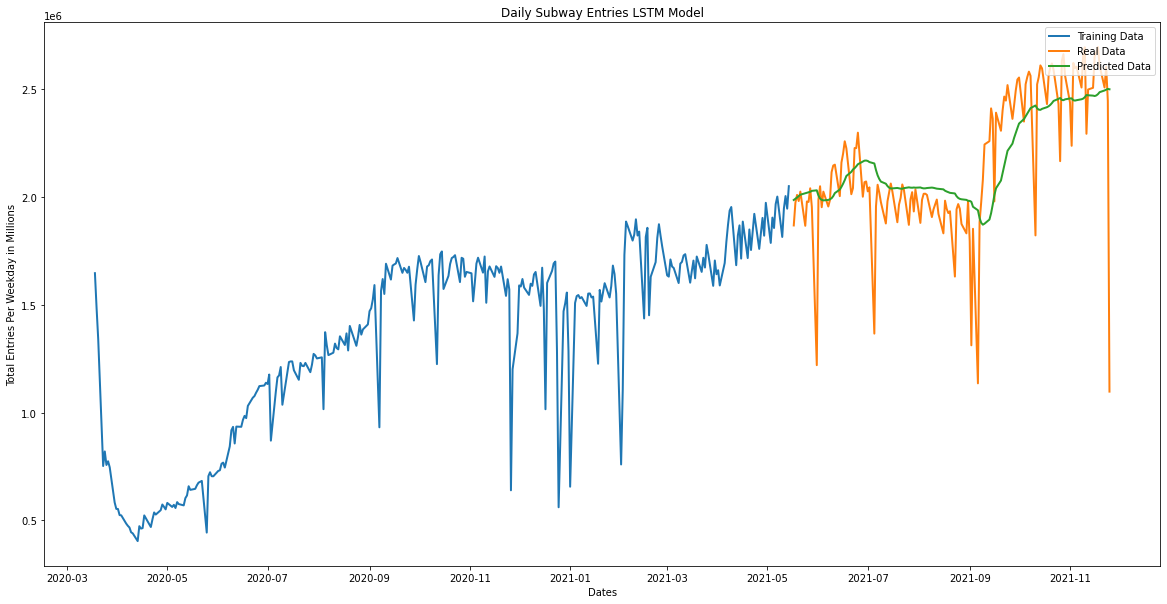

In [51]:
#RESULTS
train_data=data[:303]
test_data=data[303:]
test_data['Predictions']=predicted_subway_entries
plt.title('Daily Subway Entries LSTM Model')
plt.xlabel('Dates')
plt.ylabel('Total Entries Per Weekday in Millions')
plt.plot(train_data, lw=2, label='Training Data')
plt.plot(test_data['Total Entries'],lw =2, label='Real Data')
plt.plot(test_data['Predictions'],lw = 2, label='Predicted Data')

plt.legend(loc='upper right')

The plot above shows the same LSTM predicting the recovery trend with higher accuracy. 

Future Subway Usage Prediction

After riding on crowded subways in the past few months, we all figured we might be closer to pre-pandemic subway usage than what the data revealed to us. At the moment, we are only about half way back to what we used to call normal. Since we aren’t that close to “normal” ridership just yet, when will we be back to normal? Although the data shows we have made some good recovery in the past 2 years, there is still so much unknown about what is to come.  
	
Before the pandemic from 2016-2020, there would roughly be 5.5 million subway entries on weekdays and roughly 2.5 million subway entries on weekends. The daily usage for those four years were consistent, but after the pandemic hit, subway usage dropped dramatically. The new daily subway usage in the weeks following the pandemic were around five hundred thousand. In order to prepare our data for analysis and forecasting, we decided to filter out the weekend data in order to give us better insight into the amount of people commuting back to work. We think this visualization/analysis illustrates where the city is in its financial recovery. The amount of people returning to work in person has a significant impact on the financial recovery of the city as many office spaces, restaurants, and stores previously relied on the business of the daily commuter.


Using a python library Prophet, I was able to forecast data well into the future based on all of the existing data.  This gave the most realistic prediction in my eyes of what the future might look like. 

In [52]:
import fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [53]:
df = df.astype({"Total Entries": float})
df["Dates"] = pd.to_datetime(df.Dates, format="%Y-%m-%d")

In [54]:
df = df.rename(columns={'Dates': 'ds', 'Total Entries': 'y'})

In [55]:
m = Prophet(interval_width=0.80)
training_run = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = m.make_future_dataframe(periods=1460,freq='D')

In [57]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,5.024609e+06,3.973958e+06,5.707005e+06,5.024609e+06,5.024609e+06,-1.848178e+05,-1.848178e+05,-1.848178e+05,5.210638e+05,5.210638e+05,5.210638e+05,-705881.630756,-705881.630756,-705881.630756,0.0,0.0,0.0,4.839792e+06
1,2016-01-04,5.024010e+06,3.772007e+06,5.474364e+06,5.024010e+06,5.024010e+06,-4.384651e+05,-4.384651e+05,-4.384651e+05,2.267474e+05,2.267474e+05,2.267474e+05,-665212.539884,-665212.539884,-665212.539884,0.0,0.0,0.0,4.585545e+06
2,2016-01-05,5.023810e+06,4.093816e+06,5.835781e+06,5.023810e+06,5.023810e+06,-6.915174e+04,-6.915174e+04,-6.915174e+04,5.622330e+05,5.622330e+05,5.622330e+05,-631384.760709,-631384.760709,-631384.760709,0.0,0.0,0.0,4.954659e+06
3,2016-01-06,5.023611e+06,4.256109e+06,5.917614e+06,5.023611e+06,5.023611e+06,4.603753e+04,4.603753e+04,4.603753e+04,6.346173e+05,6.346173e+05,6.346173e+05,-588579.759268,-588579.759268,-588579.759268,0.0,0.0,0.0,5.069648e+06
4,2016-01-07,5.023411e+06,4.174706e+06,5.930441e+06,5.023411e+06,5.023411e+06,6.759393e+04,6.759393e+04,6.759393e+04,6.053636e+05,6.053636e+05,6.053636e+05,-537769.641121,-537769.641121,-537769.641121,0.0,0.0,0.0,5.091005e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2025-11-20,5.317042e+06,-2.553401e+06,1.439627e+07,-3.246803e+06,1.368458e+07,5.839216e+05,5.839216e+05,5.839216e+05,6.053636e+05,6.053636e+05,6.053636e+05,-21441.980888,-21441.980888,-21441.980888,0.0,0.0,0.0,5.900963e+06
2996,2025-11-21,5.319454e+06,-2.594610e+06,1.427603e+07,-3.254258e+06,1.369250e+07,5.002586e+05,5.002586e+05,5.002586e+05,5.210638e+05,5.210638e+05,5.210638e+05,-20805.190758,-20805.190758,-20805.190758,0.0,0.0,0.0,5.819712e+06
2997,2025-11-22,5.321866e+06,-4.566094e+06,1.255110e+07,-3.261433e+06,1.369837e+07,-1.288052e+06,-1.288052e+06,-1.288052e+06,-1.275013e+06,-1.275013e+06,-1.275013e+06,-13039.681390,-13039.681390,-13039.681390,0.0,0.0,0.0,4.033813e+06
2998,2025-11-23,5.324278e+06,-4.807272e+06,1.239366e+07,-3.268367e+06,1.369681e+07,-1.273359e+06,-1.273359e+06,-1.273359e+06,-1.275013e+06,-1.275013e+06,-1.275013e+06,1654.044394,1654.044394,1654.044394,0.0,0.0,0.0,4.050919e+06


In [58]:
forecast = forecast[forecast['ds'].dt.weekday < 5]

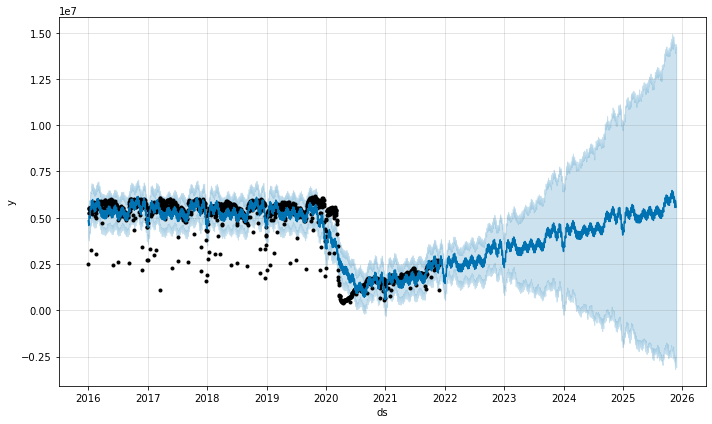

In [59]:
plot1 = m.plot(forecast)

<AxesSubplot:title={'center':'Total Subway Entries Prediction'}, xlabel='Dates', ylabel='Subway Entries in Millions'>

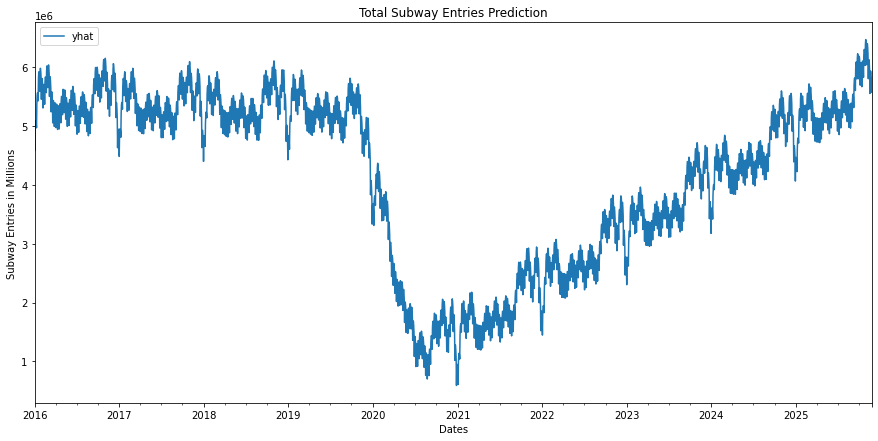

In [60]:
forecast.plot(x = 'ds', y = 'yhat', title = 'Total Subway Entries Prediction', figsize = (15,7), xlabel = 'Dates', ylabel = 'Subway Entries in Millions')


The data above is very insightful but a few things should be noted.   From 2016 to the start of the pandemic in March of 2020, there has been a very consistant number of people riding the subway on weekdays. When looking at how developed the city already is and the fact that there hasn't been any drastic changes in the amount of real estate in the city over those years, it makes sense to see a consistant number of commuters taking the subways during this time. 

What probably isn't likely in this data is the number of users in 2026 and beyond surpassing the previous average of roughly 5.5 million users.  It looks like the dark blue line is closer to a high of 6 million.  If there was more data analyzed from before the pandemic, maybe this model would level out when it gets to the 5.5 million mark.  

The graph also includes a wide margin for a larger increase in subway usage and a relapse and decrease of usage. As previously mentioned, I don't see the subway usage suddenly surpassing the previous average of 5.5 million, but with the amount of uncertainty with this pandemic, specifically the numerous variants that have been effecting our lives and new culture of working from home, I am do believe that there is a potential for the subway usage to collapse again in the future. 